**12_02_25 Esercizio individuale**

*Importare le librerie*

In [1]:
!pip install pytest

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pytest

*Caricamento del dataset*

In [3]:
df = pd.read_csv('HollywoodMovies.csv')

*Visualizzare le prime righe*

In [4]:
display(df.head())

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


*Informazioni generali sul dataset*

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

None

*1. Numero di film per anno*

In [6]:
movies_per_year = df['Year'].value_counts().sort_index()

*Grafico a barre* 

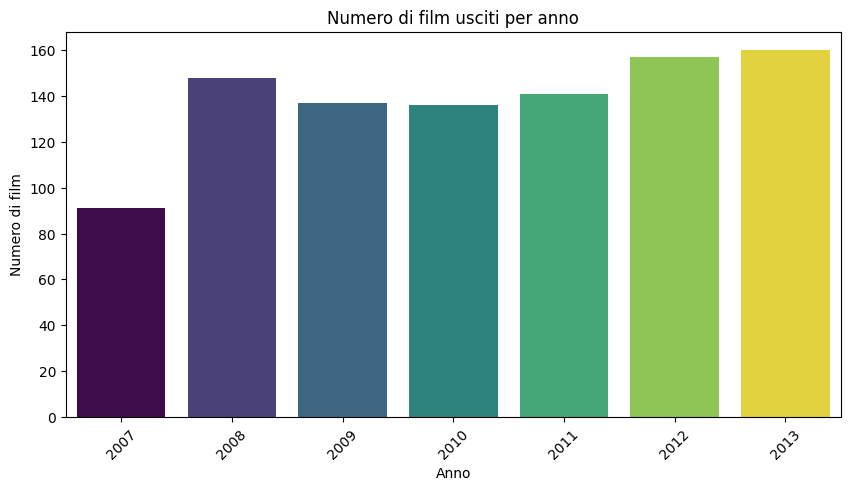

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, hue=movies_per_year.index, palette='viridis', legend=False)
plt.xlabel("Anno")
plt.ylabel("Numero di film")
plt.title("Numero di film usciti per anno")
plt.xticks(rotation=45)
plt.show()

*2. Distribuzione dei generi cinematografici*

In [8]:
genre_distribution = df['Genre'].value_counts()

*Grafico a torta*

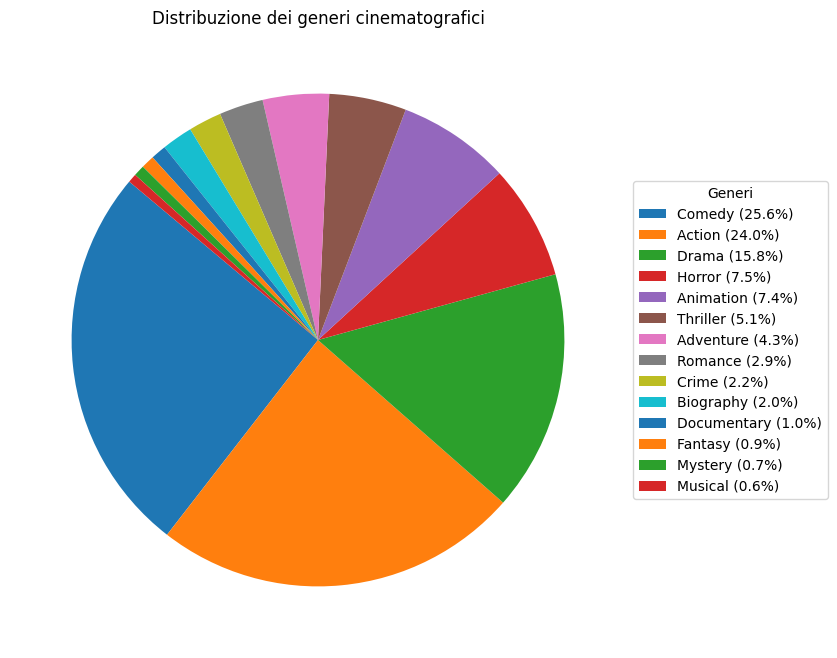

In [9]:
percentuali = (genre_distribution / genre_distribution.sum() * 100).round(1)
etichette = [f"{genere} ({perc}%)" for genere, perc in zip(genre_distribution.index, percentuali)]

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(genre_distribution, startangle=140)

plt.legend(wedges, etichette, title="Generi", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribuzione dei generi cinematografici')
plt.show()

*3. Grafico a dispersione per la relazione tra budget e incassi mondiali*

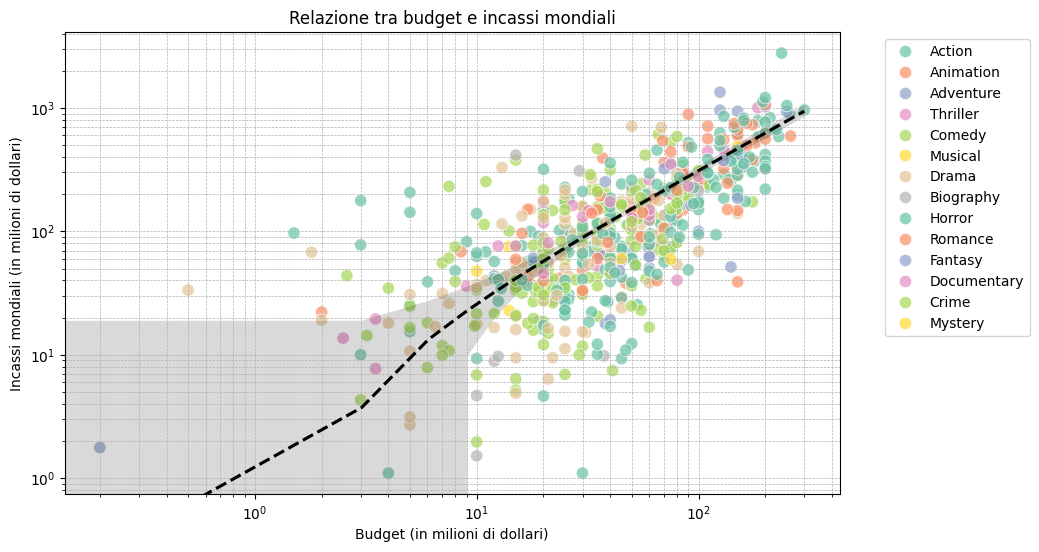

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Budget'], y=df['WorldGross'], hue=df['Genre'], palette='Set2', alpha=0.7, s=80)
sns.regplot(x=df['Budget'], y=df['WorldGross'], scatter=False, color='black', line_kws={"linestyle": "dashed"})
plt.xscale('log')
plt.yscale('log')
plt.title('Relazione tra budget e incassi mondiali')
plt.xlabel('Budget (in milioni di dollari)')
plt.ylabel('Incassi mondiali (in milioni di dollari)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**Bonus**

*TDD*

*Funzioni per testare il numero di film per anno e la distribuzione dei generi*

In [11]:
def test_movies_per_year():
    df = pd.read_csv('HollywoodMovies.csv')
    movies_per_year = df['Year'].value_counts().sort_index()

    assert movies_per_year.sum() == len(df), "La somma dei film per anno non corrisponde al numero totale di film nel DataFrame"
    assert movies_per_year.index.is_monotonic_increasing, "Gli anni non sono ordinati correttamente"

def test_genre_distribution():
    df = pd.read_csv('HollywoodMovies.csv')
    genre_distribution = df['Genre'].value_counts()

    assert genre_distribution.sum() == len(df), "La somma della distribuzione dei generi non corrisponde al numero totale di film nel DataFrame"
    assert (genre_distribution > 0).all(), "La distribuzione dei generi contiene valori negativi o nulli"
    percentuali = (genre_distribution / genre_distribution.sum() * 100).round(1)
    assert all(percentuali >= 0), "Le percentuali della distribuzione dei generi non sono correttamente calcolate"

In [12]:
pytest.main()


ERROR: usage: ipykernel_launcher.py [options] [file_or_dir] [file_or_dir] [...]
ipykernel_launcher.py: error: unrecognized arguments: -f
  inifile: None
  rootdir: C:\Users\giuli



<ExitCode.USAGE_ERROR: 4>

**Non capisco perchè non esegue i test correttamente**